## Loading FooDD Dataset in Jupyter for Inspection

This notebook was used to convert 3828 JPEG files into NumPy arrays. Each array was stored in a dictionary with the key corresponding to the class of image it was taken from. 

In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import sys

In [2]:
# Absolute path to the dataset
FooDD_path = "/Users/harrymckinney/Desktop/Capstone/FooDD"

In [3]:
# List of folders in the dataset
food_folders = glob.glob(os.path.join(FooDD_path, '*'))

# check the folder names
#food_folders

## Resize Images and Convert to NumPy Arrays

Keeps the aspect ratio the same. Need to change this if you want images all the same size.

In [4]:
def convert_with_resize(img_path,new_height):
    
    orig_img = Image.open(img_path)

    # Get original size
    original_width, original_height = orig_img.size
    aspect_ratio = original_width / original_height

    # New size using aspect ratio
    new_width = int(new_height * aspect_ratio)

    # Resize the image
    resized_image = orig_img.resize((new_width, new_height))

    # Convert resized image to NumPy array
    resized_img_arr = np.asarray(resized_image)
    
    return resized_img_arr

## Convert Entire Class Folder to NumPy Arrays

In [5]:
def ims_to_arrs(item):
    
    '''
    Inputs: item - a list of absolute paths to the images for an item.
            
    Outputs: food_arrs - a list of NumPy arrays for all images for an item.
             item_name - a string for the name of the item.
    '''
    
    #Initialize list for image file paths
    food_paths = []

    #Get the name of the item
    item_name = item.split("/")[-1]

    #Get paths of files in folder
    food_paths = glob.glob(os.path.join(item, '**',"*.[jJ][pP][gG]"), recursive=True)

    for path in food_paths:

        try:
            #Call the function that makes an array of resized (smaller) image
            img_arr = convert_with_resize(path,224)
            food_arrs.append(img_arr)
            
        #don't want to error out just give me the corrupted file path if its bad
        except Exception as e:
            print(f"Error processing image from {path}: {e}")

    print(f"Retrieved all images from {item_name} folder.")
        
    return food_arrs, item_name

This is the loop that calls `ims_to_arrs` function for each folder:

In [6]:
food_ims = dict()

for folder in food_folders:
    
    #Initialize empty list to store all the arrays (images) for an item
    food_arrs = []
    
    #Call function to convert images from a folder into a list of arrays
    food_arrs, item_name = ims_to_arrs(folder)
    
    #Assign the list of arrays to a dictionary with the key as the item name
    food_ims[item_name] = food_arrs
    
    #Update status for long runtimes
    print(f"Saved all images for {item_name} into food_ims dictionary.")
    
    #Clear the arrays and name for the next loop to free up memory
    del food_arrs, item_name
    

Retrieved all images from Apple folder.
Saved all images for Apple into food_ims dictionary.
Retrieved all images from Egg folder.
Saved all images for Egg into food_ims dictionary.
Retrieved all images from Grape & Apple folder.
Saved all images for Grape & Apple into food_ims dictionary.
Retrieved all images from Onion folder.
Saved all images for Onion into food_ims dictionary.
Retrieved all images from Bean folder.
Saved all images for Bean into food_ims dictionary.
Retrieved all images from Mixed folder.
Saved all images for Mixed into food_ims dictionary.
Retrieved all images from Cucumber folder.
Saved all images for Cucumber into food_ims dictionary.
Retrieved all images from Cheese folder.
Saved all images for Cheese into food_ims dictionary.
Retrieved all images from Watermelon folder.
Saved all images for Watermelon into food_ims dictionary.
Retrieved all images from Pasta folder.
Saved all images for Pasta into food_ims dictionary.
Retrieved all images from Net images folde

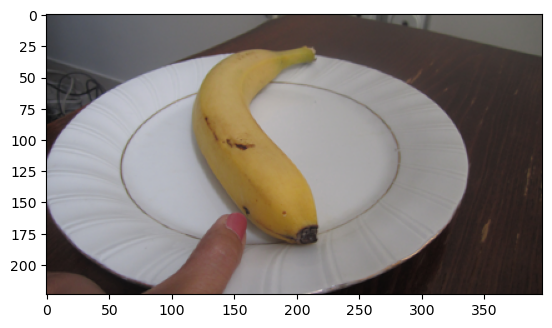

In [7]:
#Check a random image from the loaded dataset
inspect_img = food_ims["Banana"][13]
plt.imshow(inspect_img)

In [8]:
inspect_img.shape

(224, 397, 3)

In [9]:
total_arrs = 0
total_folders = 0

for key in food_ims.keys():
    print(f"There are {len(food_ims[key])} arrays for the {key} folder")
    total_arrs += len(food_ims[key])
    total_folders += 1

print(f"\nThere are {total_arrs} total arrays.")
print(f"\nThere are {total_folders} folders in total.")

There are 435 arrays for the Apple folder
There are 267 arrays for the Egg folder
There are 34 arrays for the Grape & Apple folder
There are 328 arrays for the Onion folder
There are 279 arrays for the Bean folder
There are 106 arrays for the Mixed folder
There are 120 arrays for the Cucumber folder
There are 259 arrays for the Cheese folder
There are 75 arrays for the Watermelon folder
There are 207 arrays for the Pasta folder
There are 198 arrays for the Net images folder
There are 268 arrays for the Bread folder
There are 119 arrays for the Banana folder
There are 209 arrays for the sauce folder
There are 164 arrays for the Grape folder
There are 94 arrays for the Pepper folder
There are 274 arrays for the Tomato folder
There are 61 arrays for the Qiwi folder
There are 235 arrays for the Orange folder
There are 96 arrays for the Carrot folder

There are 3828 total arrays.

There are 20 folders in total.


In [10]:
import h5py

with h5py.File('FooDD_Dictionary.h5', 'w') as hf:
    for key, value in food_ims.items():
        hf.create_dataset(key, data=value)     

/Users/harrymckinney/anaconda3/envs/capstone/lib/python3.10/site-packages/h5py/_hl/base.py:118: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data, order="C", dtype=as_dtype)


ValueError: could not broadcast input array from shape (224,298,3) into shape (224,)